In [2]:
!pip install geopandas


     |████████████████████████████████| 1.0MB 4.7MB/s 
     |████████████████████████████████| 6.5MB 8.7MB/s 
     |████████████████████████████████| 15.3MB 271kB/s 


In [124]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

In [125]:
neighbourhood_data = gpd.read_file('neighbourhoods.geojson')
neighbourhood_data.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [126]:
neighbourhood_data['neighbourhood_group'].value_counts()

Series([], Name: neighbourhood_group, dtype: int64)

In [127]:
neighbourhood_data['neighbourhood_group'].unique()

array([None], dtype=object)

In [128]:
neighbourhood_data.drop(['neighbourhood_group'],axis = 1, inplace = True)

In [129]:
neighbourhood_data.head()

,neighbourhood,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [130]:
neighbourhood_data['neighbourhood'].duplicated().any()

False

In [131]:
neighbourhood_data.set_index('neighbourhood', inplace = True)

In [132]:
listings  = pd.read_csv('listings.csv')

In [133]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [134]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [135]:
listings.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,2.604226e+07,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.500293e+07,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.265000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.319740e+07,1.098138e+07,NaN,78704.000000,30.245163,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,2.580636e+07,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,4.006138e+07,1.410198e+08,NaN,78745.000000,30.305237,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,4.811152e+07,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


In [136]:
listings['neighbourhood'].unique()

array([78702, 78704, 78729, 78759, 78741, 78703, 78757, 78727, 78731,
       78758, 78744, 78705, 78722, 78725, 78701, 78751, 78723, 78752,
       78736, 78732, 78746, 78745, 78754, 78730, 78724, 78753, 78756,
       78749, 78735, 78721, 78734, 78739, 78733, 78737, 78748, 78738,
       78726, 78717, 78750, 78728, 78712, 78742, 78747, 78719])

In [137]:
listings['neighbourhood'].value_counts()

78704    1822
78702    1263
78701     713
78741     622
78703     530
78745     513
78705     505
78751     478
78723     313
78758     298
78746     256
78734     227
78757     205
78721     204
78722     197
78744     173
78748     148
78756     129
78729     124
78731     121
78752     116
78749     110
78754     106
78753     103
78735     100
78727     100
78737      97
78759      85
78717      74
78733      67
78724      62
78728      60
78736      49
78732      47
78738      44
78725      42
78750      41
78747      40
78730      37
78739      25
78726      15
78742       5
78719       4
78712       2
Name: neighbourhood, dtype: int64

In [138]:
new_listings = listings.groupby(['neighbourhood']).count()\
.rename(columns = {"id":"count"})

In [139]:
new_listings  = new_listings['count']
new_listings.head()

neighbourhood
78701     713
78702    1263
78703     530
78704    1822
78705     505
Name: count, dtype: int64

In [140]:
new_listings = pd.DataFrame(data = new_listings)

In [141]:
new_listings.index = new_listings.index.astype(int)
new_listings.head()

,count
neighbourhood,
78701,713
78702,1263
78703,530
78704,1822
78705,505


In [142]:
neighbourhood_data.sort_index(inplace= True)
neighbourhood_data.index = neighbourhood_data.index.astype(int)
neighbourhood_data.head()

,geometry
neighbourhood,
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."


In [143]:
neighbourhood_data.index.dtype

dtype('int64')

In [144]:
new_listings.index.dtype

dtype('int64')

In [145]:
merged = pd.merge(neighbourhood_data,new_listings, left_index = True, right_index = True, how = 'inner')

In [146]:
# top areas with highest number of listings
merged.sort_values('count', ascending = False)

,geometry,count
neighbourhood,,
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",1822
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",1263
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",713
78741,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",622
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",530
78745,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",513
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",505
78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",478
78723,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",313


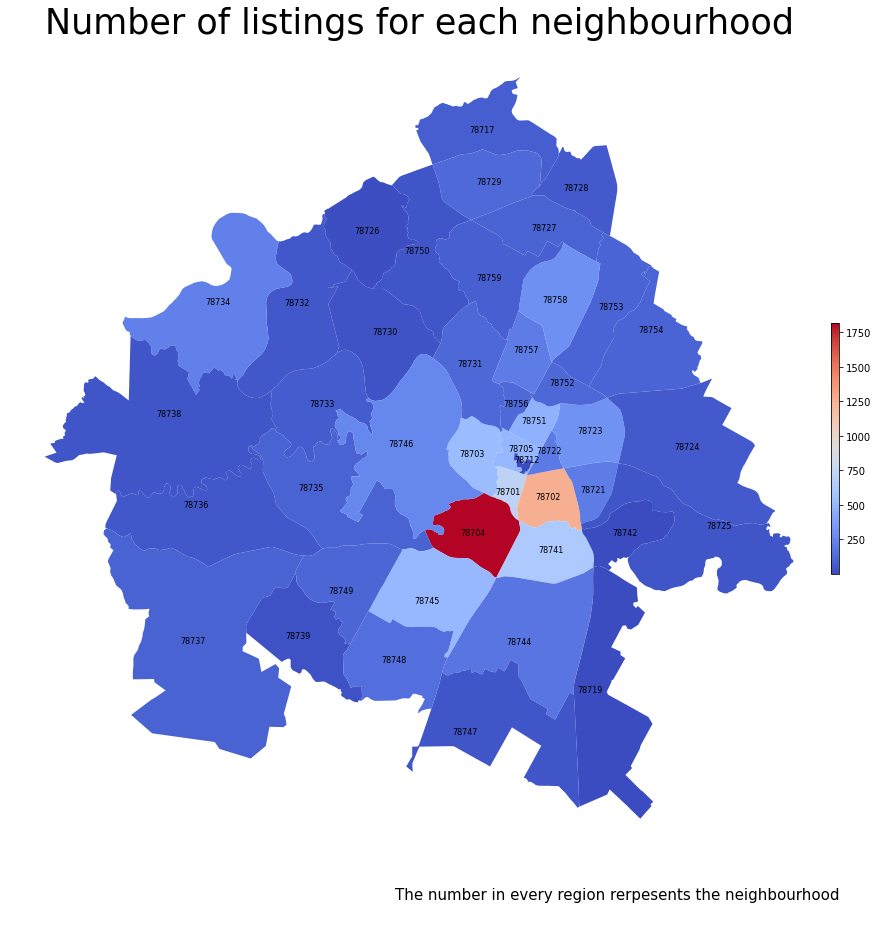

In [50]:
vmin, vmax = merged['count'].min(), merged['count'].max()
fig, ax = plt.subplots(1 , figsize = (15,15))
ax.axis('off')
ax.set_title('Number of listings for each neighbourhood', fontdict = {'fontsize': '35','fontweight': '3'})

ax.annotate('The number in every region rerpesents the neighbourhood', xy = (0.45, 0.05), 
            xycoords = 'figure fraction', fontsize = 15, color  = 'black')

sm = plt.cm.ScalarMappable(cmap = 'coolwarm', norm =plt.Normalize(vmin = vmin, vmax = vmax))
sm.set_array([])

fig.colorbar(sm, orientation = "vertical", fraction = 0.01, pad = 0, aspect = 30)

merged.plot(column = 'count', cmap = 'coolwarm', linewidth = 0.0, ax = ax, edgecolor = '0.8')
merged['coords'] = merged['geometry'].apply(lambda x:x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(str(idx), xy = row['coords'], horizontalalignment = 'center', fontsize = 8)
plt.savefig("Number_of_listings_for_each_neighbourhood.png")


In [47]:
from google.colab import files

In [80]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [81]:
Entire_home = listings[listings['room_type'] == 'Entire home/apt'][['neighbourhood', 'room_type']]

In [82]:
Entire_home

,neighbourhood,room_type
0,78702,Entire home/apt
2,78702,Entire home/apt
3,78704,Entire home/apt
5,78704,Entire home/apt
6,78704,Entire home/apt
...,...,...
10267,78758,Entire home/apt
10268,78758,Entire home/apt
10269,78729,Entire home/apt
10270,78701,Entire home/apt


In [83]:
Private_room = listings[listings['room_type'] == 'Private room'][['neighbourhood', 'room_type']]
Private_room

,neighbourhood,room_type
1,78702,Private room
4,78729,Private room
13,78727,Private room
15,78758,Private room
25,78704,Private room
...,...,...
10245,78705,Private room
10246,78705,Private room
10248,78705,Private room
10258,78744,Private room


In [84]:
Hotel_room = listings[listings['room_type'] == 'Hotel room'][['neighbourhood', 'room_type']]
Hotel_room

,neighbourhood,room_type
171,78734,Hotel room
3018,78701,Hotel room
3160,78701,Hotel room
4454,78701,Hotel room
5813,78733,Hotel room
6132,78701,Hotel room
6692,78746,Hotel room
7044,78701,Hotel room
7161,78701,Hotel room
8366,78746,Hotel room


In [85]:
Shared_room = listings[listings['room_type'] == 'Shared room'][['neighbourhood', 'room_type']]
Shared_room


,neighbourhood,room_type
692,78705,Shared room
1152,78744,Shared room
1260,78741,Shared room
1313,78741,Shared room
1417,78741,Shared room
...,...,...
9533,78702,Shared room
9818,78721,Shared room
10010,78705,Shared room
10094,78724,Shared room


In [86]:
Entire_home = Entire_home.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Private_room = Private_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Hotel_room = Hotel_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Shared_room = Shared_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})


In [87]:
Entire_home.count()

count    44
dtype: int64

In [88]:
Private_room.count()

count    43
dtype: int64

In [89]:
Hotel_room.count()

count    5
dtype: int64

In [90]:
Shared_room.count()

count    27
dtype: int64

In [91]:
Entire_home.head()

,count
neighbourhood,
78701,644
78702,1065
78703,475
78704,1589
78705,345


In [92]:
Hotel_room  = Hotel_room.join(neighbourhood_data, how = 'right')

In [93]:
Hotel_room

,count,geometry
neighbourhood,,
78701,6.0,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,NaN,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,NaN,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,1.0,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,NaN,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78712,NaN,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
78717,NaN,"MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ..."
78719,NaN,"MULTIPOLYGON (((-97.65158 30.20143, -97.65287 ..."
78721,NaN,"MULTIPOLYGON (((-97.66540 30.28564, -97.66598 ..."


In [94]:
Hotel_room.replace(np.nan, 0.0, inplace = True)


In [95]:
Hotel_room.count()

count       44
geometry    44
dtype: int64

In [97]:
Hotel_room = gpd.GeoDataFrame(Hotel_room)
Hotel_room

,count,geometry
neighbourhood,,
78701,6.0,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,0.0,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,0.0,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,1.0,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,0.0,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78712,0.0,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
78717,0.0,"MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ..."
78719,0.0,"MULTIPOLYGON (((-97.65158 30.20143, -97.65287 ..."
78721,0.0,"MULTIPOLYGON (((-97.66540 30.28564, -97.66598 ..."


### Thematic maps

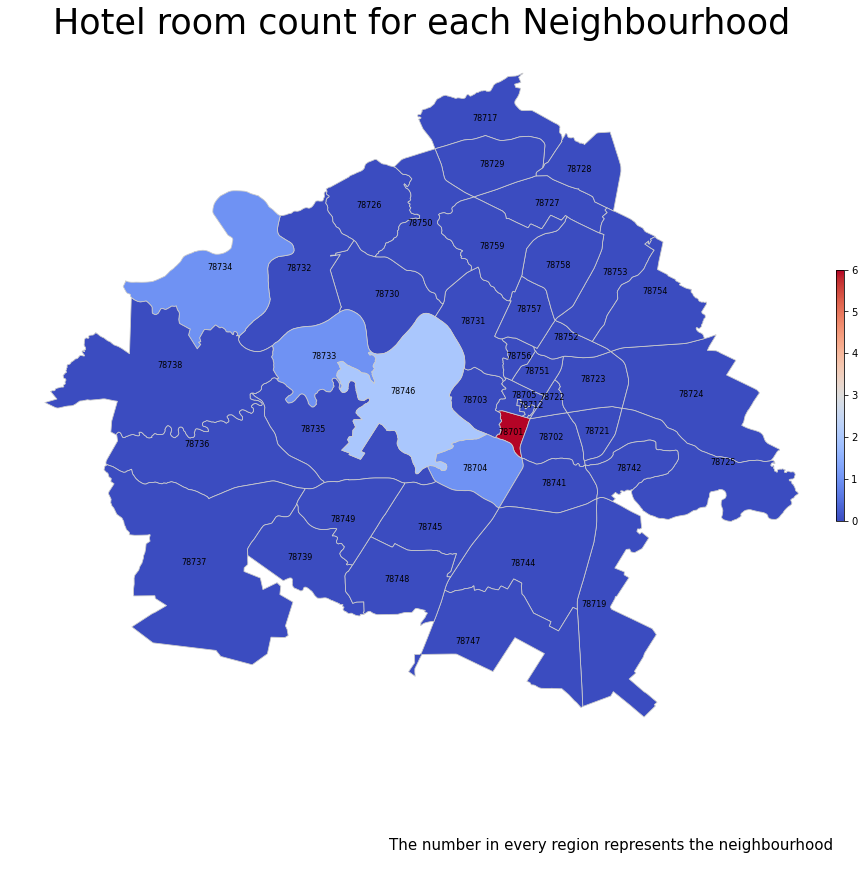

In [98]:
vmin, vmax = Hotel_room['count'].min(), Hotel_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Hotel room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Hotel_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Hotel_room['coords'] = Hotel_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Hotel_room['coords'] = [coords[0] for coords in Hotel_room['coords']]
for idx, row in Hotel_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)
plt.savefig('Hotel_room_count_for_each_neighbourhood.png')

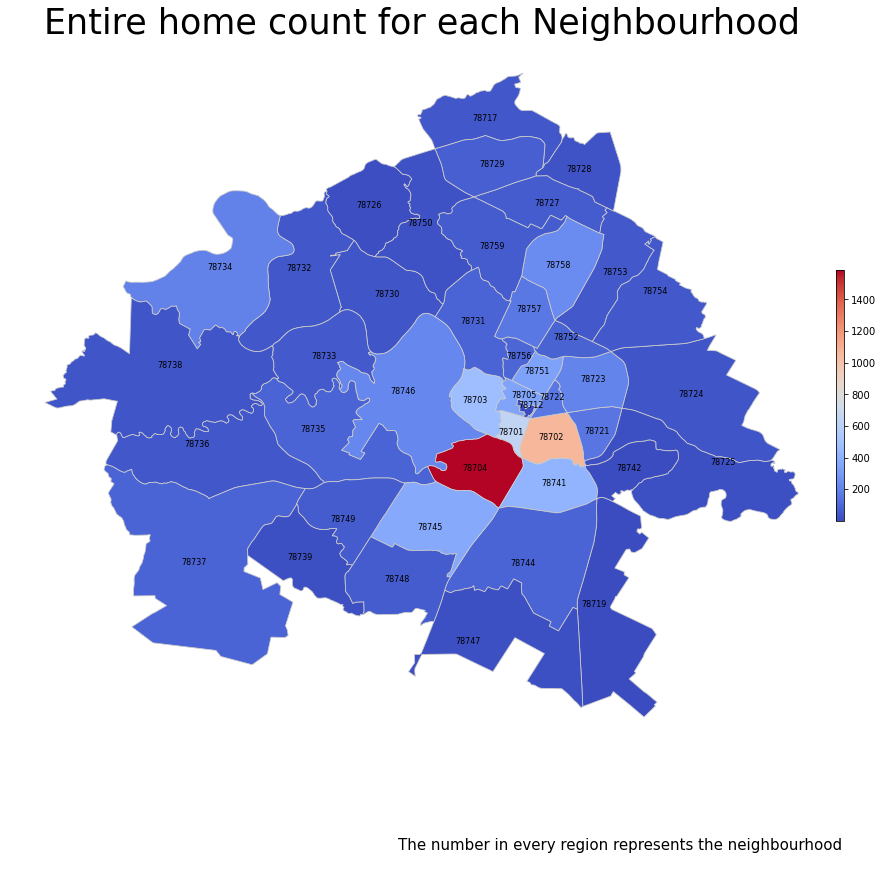

In [99]:
Entire_home = Entire_home.join(neighbourhood_data,how = 'right')
Entire_home.replace(np.nan, 0.0, inplace = True)
Entire_home = gpd.GeoDataFrame(Entire_home)
vmin, vmax = Entire_home['count'].min(), Entire_home['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Entire home count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Entire_home.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Entire_home['coords'] = Entire_home['geometry'].apply(lambda x: x.representative_point().coords[:])
Entire_home['coords'] = [coords[0] for coords in Entire_home['coords']]
for idx, row in Entire_home.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)

plt.savefig('Entire_home_count_for_each_Neighbourhood.png')

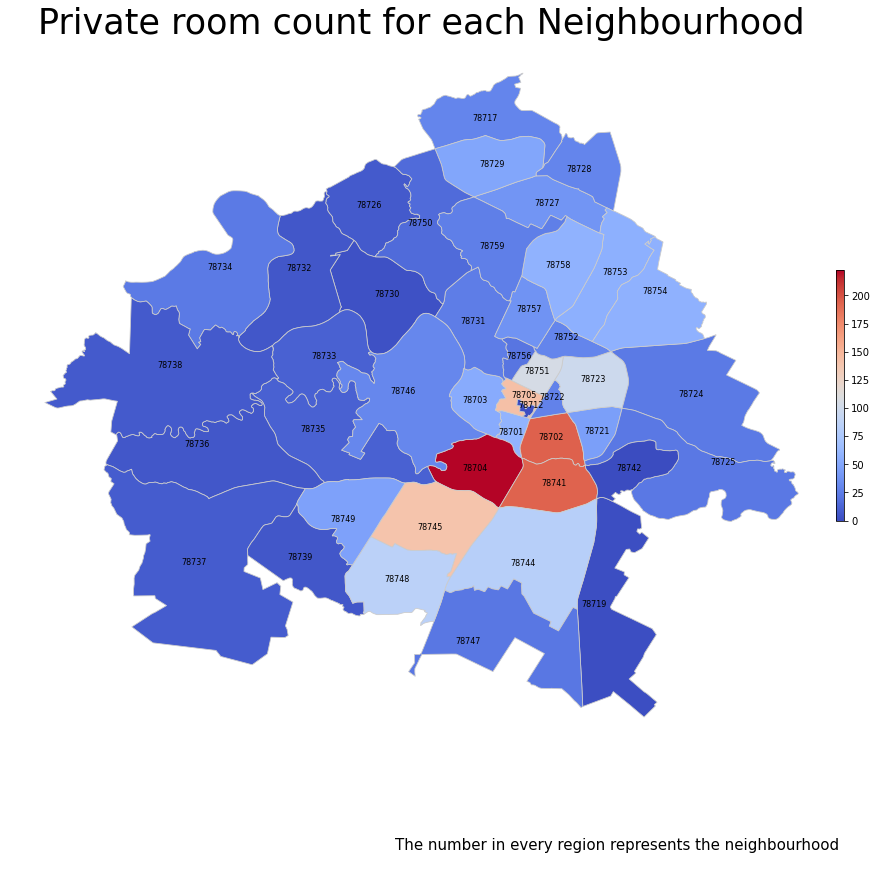

In [100]:
Private_room = Private_room.join(neighbourhood_data,how = 'right')
Private_room.replace(np.nan, 0.0, inplace = True)
Private_room = gpd.GeoDataFrame(Private_room)
vmin, vmax = Private_room['count'].min(), Private_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Private room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Private_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Private_room['coords'] = Private_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Private_room['coords'] = [coords[0] for coords in Private_room['coords']]
for idx, row in Private_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)
plt.savefig('Private_room_count_for_each_Neighbourhood.png')

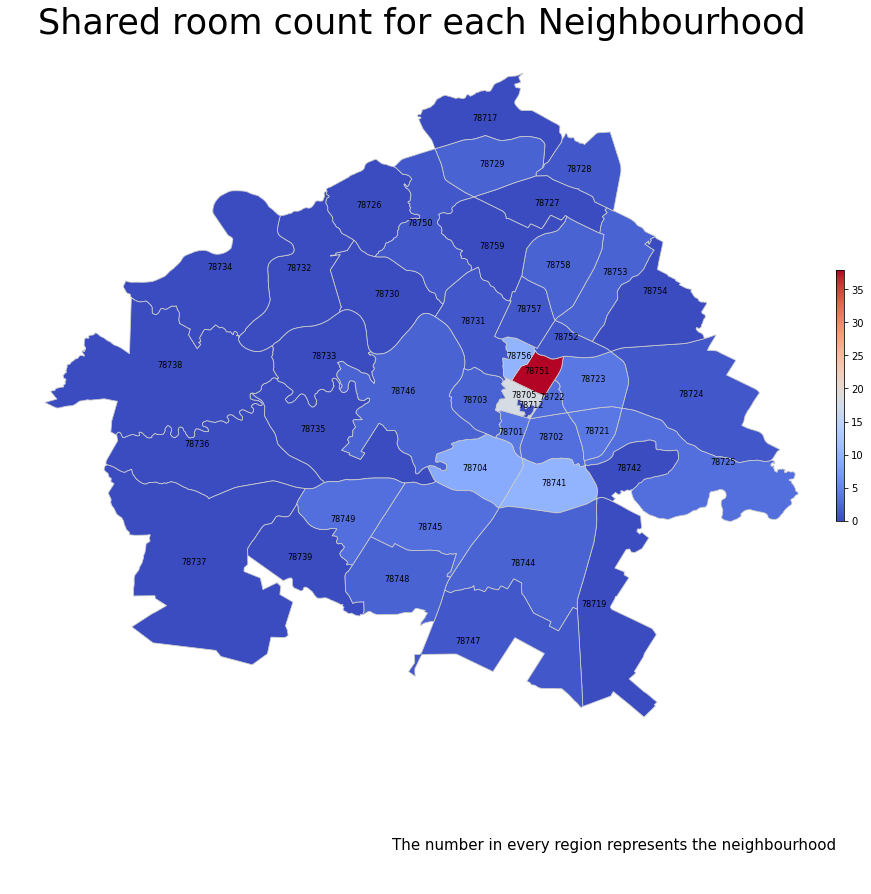

In [101]:
Shared_room = Shared_room.join(neighbourhood_data,how = 'right')
Shared_room.replace(np.nan, 0.0, inplace = True)
Shared_room = gpd.GeoDataFrame(Shared_room)
vmin, vmax = Shared_room['count'].min(), Shared_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Shared room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Shared_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Shared_room['coords'] = Shared_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Shared_room['coords'] = [coords[0] for coords in Shared_room['coords']]
for idx, row in Shared_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)
plt.savefig('Shared_room_count_for_each_neighbourhood.png')

In [102]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [103]:
listings.shape[0]

10272

In [120]:
#top 10 hosts by their total number of listings

listings['host_name'].value_counts().head(10)

Kia                         398
WanderJaunt                 131
TurnKey Vacation Rentals    124
Martin                      101
Michael                      98
David                        76
Sarah                        74
Ryan                         67
James                        62
Renters Club                 56
Name: host_name, dtype: int64